In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

In [5]:
f = open("../ignore/analysis_1995/users_5n_and_top_20220829.txt", "r")
U = []
for item in f.readlines():
    user, _, _ = item.split()
    U.append(user)

In [6]:
N = np.load("../ignore/analysis_1995/users_5n_and_top_20220829.npy")

In [7]:
assert len(U) == len(set(U))
assert len(U) == len(N)

In [8]:
checked_users = set()
new_N = []
for i, user in enumerate(U):
    if user in checked_users:
        continue
    checked_users.add(user)
    new_N.append(N[i])

In [9]:
N = np.array(new_N).T

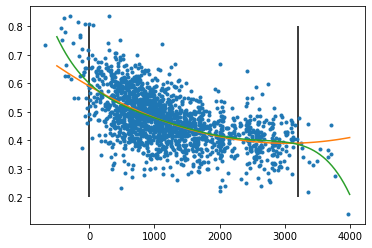

           2
2.173e-08 x - 0.000132 x + 0.5904
-0.5622444854935578


In [10]:
x = N[0]
y = N[1]

p2 = np.poly1d(np.polyfit(x, y, 2))
p5 = np.poly1d(np.polyfit(x, y, 5))

xp = np.linspace(-500, 4000, 100)
plt.vlines([0,3200], 0.2, 0.8)

plt.plot(x, y, '.')
plt.plot(xp, p2(xp), '-')
plt.plot(xp, p5(xp), '-')

plt.show()
print(p2)
print(np.corrcoef(x, y)[0,1])

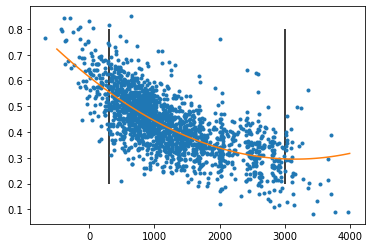

           2
3.175e-08 x - 0.000201 x + 0.6133
-0.6872511682785242


In [11]:
x = N[0]
y = N[2]
z = np.polyfit(x, y, 2)

p = np.poly1d(z)
xp = np.linspace(-500, 4000, 100)
plt.vlines([300,3000], 0.2, 0.8)

plt.plot(x, y, '.', xp, p(xp), '-')
plt.show()
print(p)
print(np.corrcoef(x, y)[0,1])